# Classifier of Quality - Big Data Analytics | 110118055

## Part 2: Classification of Quality based on Different Attributes.

#### importing the numpy, pandas, warning, matplotlib, seaborn, sklearn, math libraries.


In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression as LogReg
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, recall_score, precision_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model
from math import sqrt
from sklearn.preprocessing import StandardScaler, LabelEncoder

#### importing the dataset from our saved files.

In [22]:
df_test = pd.read_csv(r"C:\Users\Nachiket Sanjay\Desktop\Semester 5\Sent files\winequality_test.csv")
df_train = pd.read_csv(r"C:\Users\Nachiket Sanjay\Desktop\Semester 5\BDA Assignment\winequality_train.csv")

In [23]:
df_train.head(2)

,Fixed Acidity,Volatile Acidity,Citric Acid,Residual Sugar,Chlorides,Free Sulfur Dioxide,Total Sulfur Dioxide,Density,pH,Sulphates,Alcohol,Quality
0,10.6,0.28,0.39,15.5,0.069,6,23,1.0026,3.12,0.66,9.2,5
1,9.4,0.30,0.56,2.8,0.080,6,17,0.9964,3.15,0.92,11.7,8


In [24]:
df_test.head(2)

,Fixed Acidity,Volatile Acidity,Citric Acid,Residual Sugar,Chlorides,Free Sulfur Dioxide,Total Sulfur Dioxide,Density,pH,Sulphates,Alcohol,Quality
0,7.4,0.70,0.0,1.9,0.076,11.0,34,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.0,2.6,0.098,25.0,67,0.9968,3.20,0.68,9.8,5


### Information about the training and the test datasets which we are going to use for the Logistic Regression.

In [25]:
df_test.describe()

,Fixed Acidity,Volatile Acidity,Citric Acid,Residual Sugar,Chlorides,Free Sulfur Dioxide,Total Sulfur Dioxide,Density,pH,Sulphates,Alcohol,Quality
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000
mean,8.650417,0.536115,0.297000,2.549583,0.094542,15.078125,51.952083,0.997398,3.294646,0.696146,10.086667,5.564583
std,1.896574,0.176453,0.217777,1.249797,0.061136,9.726030,33.774207,0.001676,0.155418,0.213667,0.968518,0.769998
min,4.600000,0.180000,0.000000,1.200000,0.039000,3.000000,8.000000,0.991200,2.740000,0.330000,8.700000,3.000000
25%,7.400000,0.407500,0.100000,1.900000,0.073000,7.000000,26.000000,0.996400,3.190000,0.560000,9.400000,5.000000
50%,8.100000,0.530000,0.260000,2.200000,0.082000,12.500000,43.000000,0.997200,3.290000,0.635000,9.800000,5.000000
75%,9.625000,0.641250,0.480000,2.600000,0.093000,20.000000,67.000000,0.998400,3.380000,0.780000,10.500000,6.000000
max,15.600000,1.330000,1.000000,11.000000,0.611000,68.000000,165.000000,1.003200,3.900000,2.000000,14.000000,8.000000


In [26]:
df_train.describe()

,Fixed Acidity,Volatile Acidity,Citric Acid,Residual Sugar,Chlorides,Free Sulfur Dioxide,Total Sulfur Dioxide,Density,pH,Sulphates,Alcohol,Quality
count,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000
mean,8.177748,0.524263,0.259812,2.534182,0.084432,16.218052,44.116175,0.996467,3.318177,0.641850,10.567248,5.666667
std,1.650661,0.180127,0.183042,1.473798,0.039168,10.747167,32.242414,0.001905,0.153471,0.143606,1.073285,0.821593
min,4.900000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.860000,0.370000,8.400000,3.000000
25%,7.000000,0.390000,0.090000,1.900000,0.069000,7.000000,20.000000,0.995300,3.220000,0.540000,9.600000,5.000000
50%,7.800000,0.510000,0.250000,2.200000,0.078000,14.000000,35.000000,0.996400,3.320000,0.620000,10.400000,6.000000
75%,9.100000,0.640000,0.400000,2.600000,0.088000,23.000000,59.000000,0.997600,3.410000,0.710000,11.300000,6.000000
max,15.900000,1.580000,0.780000,15.500000,0.422000,72.000000,289.000000,1.003690,4.010000,1.620000,14.900000,8.000000


In [27]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Fixed Acidity         480 non-null    float64
 1   Volatile Acidity      480 non-null    float64
 2   Citric Acid           480 non-null    float64
 3   Residual Sugar        480 non-null    float64
 4   Chlorides             480 non-null    float64
 5   Free Sulfur Dioxide   480 non-null    float64
 6   Total Sulfur Dioxide  480 non-null    int64  
 7   Density               480 non-null    float64
 8   pH                    480 non-null    float64
 9   Sulphates             480 non-null    float64
 10  Alcohol               480 non-null    float64
 11  Quality               480 non-null    int64  
dtypes: float64(10), int64(2)
memory usage: 45.1 KB


In [28]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1119 entries, 0 to 1118
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Fixed Acidity         1119 non-null   float64
 1   Volatile Acidity      1119 non-null   float64
 2   Citric Acid           1119 non-null   float64
 3   Residual Sugar        1119 non-null   float64
 4   Chlorides             1119 non-null   float64
 5   Free Sulfur Dioxide   1119 non-null   int64  
 6   Total Sulfur Dioxide  1119 non-null   int64  
 7   Density               1119 non-null   float64
 8   pH                    1119 non-null   float64
 9   Sulphates             1119 non-null   float64
 10  Alcohol               1119 non-null   float64
 11  Quality               1119 non-null   int64  
dtypes: float64(9), int64(3)
memory usage: 105.0 KB


### We find whether the above data has any null values for further cleaning of the data.

In [29]:
df_train.isnull().sum()
df_test.isnull().sum()

Fixed Acidity           0
Volatile Acidity        0
Citric Acid             0
Residual Sugar          0
Chlorides               0
Free Sulfur Dioxide     0
Total Sulfur Dioxide    0
Density                 0
pH                      0
Sulphates               0
Alcohol                 0
Quality                 0
dtype: int64

##### there are no null values in our dataset, hence we can proceed further with the representation of the dataset by plotting and start classification of the data.

#### Target variable - "Quality", we will start classifying the target variable with the help of the seaborn library.


Countplot for the Quality attribute in the training dataset.

6    462
5    448
7    150
4     37
8     13
3      9
Name: Quality, dtype: int64

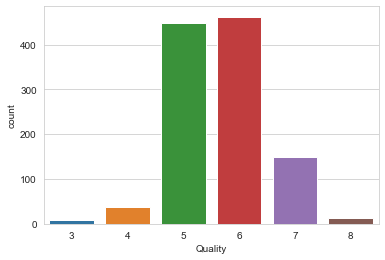

In [30]:
sns.countplot(df_train['Quality'])
df_train['Quality'].value_counts()

### For the training dataset, the Quality index of 6 is the greatest, followed by 5,7,4,8 and 3.

Countplot for Quality attribute in the test dataset.

5    233
6    176
7     49
4     16
8      5
3      1
Name: Quality, dtype: int64

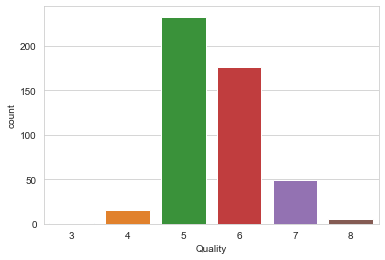

In [31]:
sns.countplot(df_test['Quality'])
df_test['Quality'].value_counts()

### From the above countplot table, we find that the Quality for 5 is the greatest, preceded by 6,7,4,8 and finally 3. 

## Finding the relation between all the other attributes in the dataset with respect to quality - boxplots. 
### for training dataset.

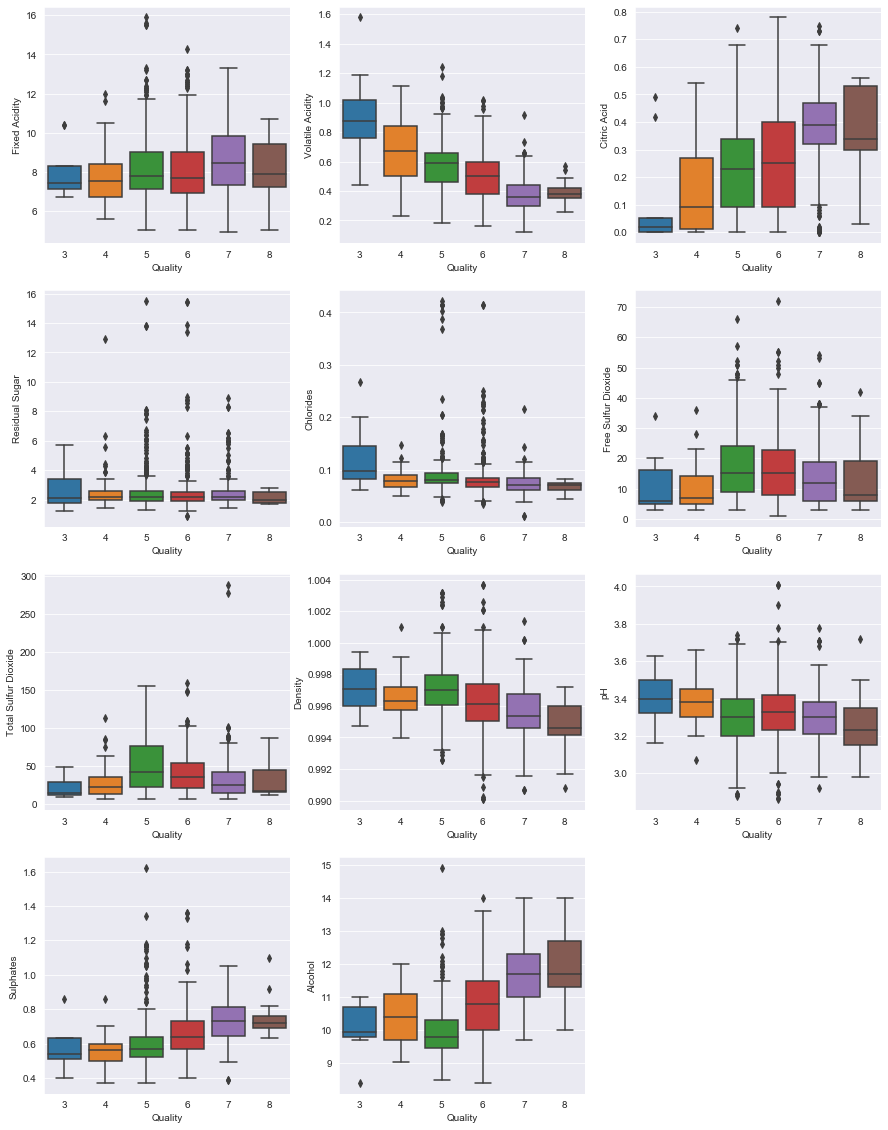

In [32]:
sns.set_style("darkgrid")
fig = plt.figure(figsize = [15,20])
cols = ['Fixed Acidity', 'Volatile Acidity', 'Citric Acid', 'Residual Sugar', 'Chlorides', 'Free Sulfur Dioxide', 'Total Sulfur Dioxide', 'Density', 'pH', 'Sulphates', 'Alcohol']
cnt = 1
for col in cols :
    plt.subplot(4,3,cnt)
    sns.boxplot(data = df_train, x = 'Quality', y = col)
    cnt+=1
plt.show()

## Finding the relation between all the other attributes in the dataset with respect to quality - boxplots. 
### for testing dataset.

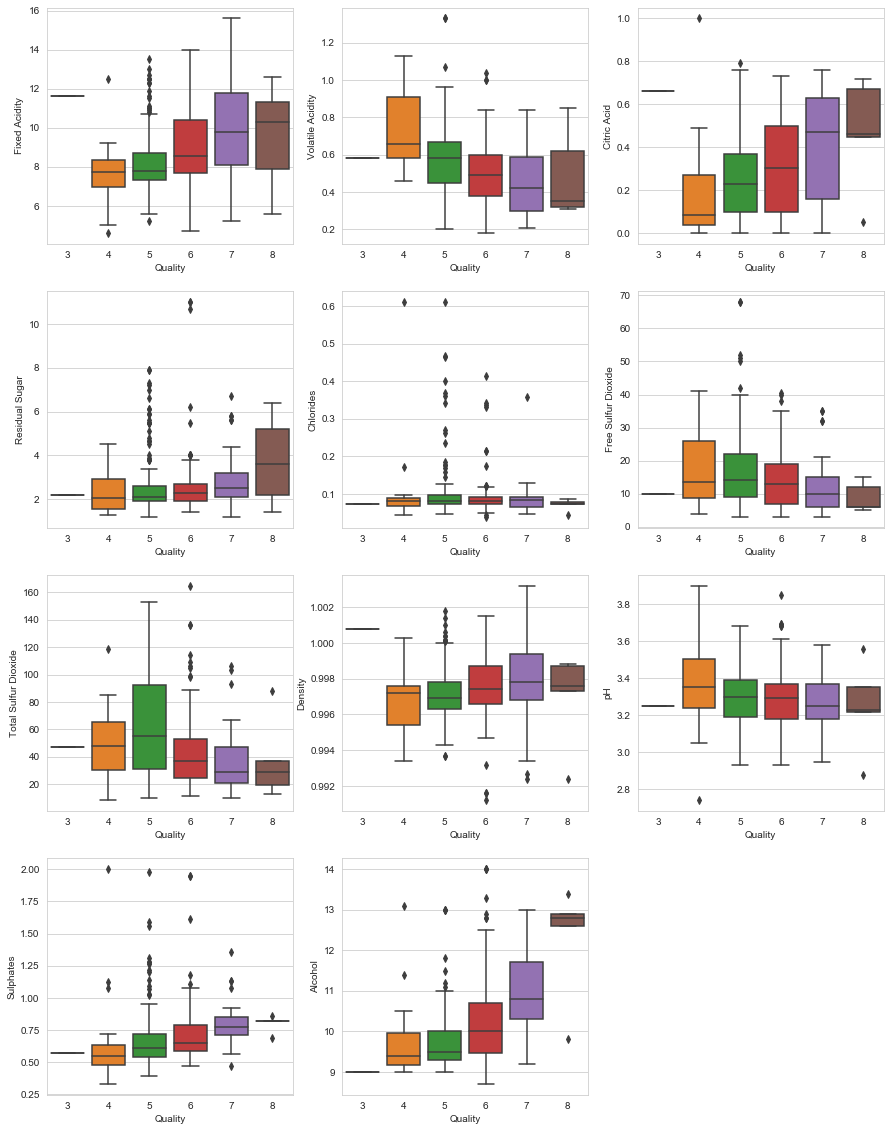

In [33]:
sns.set_style("whitegrid")
fig = plt.figure(figsize = [15,20])
cols = ['Fixed Acidity', 'Volatile Acidity', 'Citric Acid', 'Residual Sugar', 'Chlorides', 'Free Sulfur Dioxide', 'Total Sulfur Dioxide', 'Density', 'pH', 'Sulphates', 'Alcohol']
cnt = 1
for col in cols :
    plt.subplot(4,3,cnt)
    sns.boxplot(data = df_test, x = 'Quality', y = col)
    cnt+=1
plt.show()

***
# Classification part.

In [34]:
feature_cols=['Fixed Acidity','Volatile Acidity','Citric Acid','Residual Sugar','Chlorides','Free Sulfur Dioxide','Total Sulfur Dioxide','Density','pH','Sulphates','Alcohol']

In [35]:
bins = (2, 3, 4, 5, 6, 10)
group_names = ['bad','bad','bad','bad','bad', 'good']
df_train['Quality'] = pd.cut(df_train['Quality'], bins = bins, labels = group_names)

ValueError: Bin labels must be one fewer than the number of bin edges

In [41]:
df_train.head(10)

,Fixed Acidity,Volatile Acidity,Citric Acid,Residual Sugar,Chlorides,Free Sulfur Dioxide,Total Sulfur Dioxide,Density,pH,Sulphates,Alcohol,Quality
0,10.6,0.280,0.39,15.5,0.069,6,23,1.0026,3.12,0.66,9.2,bad
1,9.4,0.300,0.56,2.8,0.080,6,17,0.9964,3.15,0.92,11.7,good
2,10.6,0.360,0.59,2.2,0.152,6,18,0.9986,3.04,1.05,9.4,bad
3,10.6,0.360,0.60,2.2,0.152,7,18,0.9986,3.04,1.06,9.4,bad
4,10.6,0.440,0.68,4.1,0.114,6,24,0.9970,3.06,0.66,13.4,bad
5,10.2,0.670,0.39,1.9,0.054,6,17,0.9976,3.17,0.47,10.0,bad
6,10.2,0.670,0.39,1.9,0.054,6,17,0.9976,3.17,0.47,10.0,bad
7,10.2,0.645,0.36,1.8,0.053,5,14,0.9982,3.17,0.42,10.0,bad
8,11.6,0.320,0.55,2.8,0.081,35,67,1.0002,3.32,0.92,10.8,good
9,9.3,0.390,0.40,2.6,0.073,10,26,0.9984,3.34,0.75,10.2,bad


In [36]:
bins = (0, 6, 10)
group_names = ['bad', 'good']
df_test['Quality'] = pd.cut(df_test['Quality'], bins = bins, labels = group_names)

In [37]:
df_test.head(10)

,Fixed Acidity,Volatile Acidity,Citric Acid,Residual Sugar,Chlorides,Free Sulfur Dioxide,Total Sulfur Dioxide,Density,pH,Sulphates,Alcohol,Quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60,0.9980,3.16,0.58,9.8,bad
4,7.4,0.70,0.00,1.9,0.076,11.0,34,0.9978,3.51,0.56,9.4,bad
5,7.4,0.66,0.00,1.8,0.075,13.0,40,0.9978,3.51,0.56,9.4,bad
6,7.9,0.60,0.06,1.6,0.069,15.0,59,0.9964,3.30,0.46,9.4,bad
7,7.3,0.65,0.00,1.2,0.065,15.0,21,0.9946,3.39,0.47,10.0,good
8,7.8,0.58,0.02,2.0,0.073,9.0,18,0.9968,3.36,0.57,9.5,good
9,7.5,0.50,0.36,6.1,0.071,17.0,102,0.9978,3.35,0.80,10.5,bad


In [44]:
df_train['Quality'].value_counts()

bad     956
good    163
Name: Quality, dtype: int64

In [45]:
label_quality = LabelEncoder()
df_train['Quality'] = label_quality.fit_transform(df_train['Quality'])
df_test['Quality'] = label_quality.fit_transform(df_test['Quality'])

In [47]:
X_train = df_train.drop('Quality', axis = 1)
Y_train = df_train['Quality']
x_test =  df_test.drop('Quality', axis = 1)
y_test =  df_test['Quality']

In [48]:
df_train.head(10)

,Fixed Acidity,Volatile Acidity,Citric Acid,Residual Sugar,Chlorides,Free Sulfur Dioxide,Total Sulfur Dioxide,Density,pH,Sulphates,Alcohol,Quality
0,10.6,0.280,0.39,15.5,0.069,6,23,1.0026,3.12,0.66,9.2,0
1,9.4,0.300,0.56,2.8,0.080,6,17,0.9964,3.15,0.92,11.7,1
2,10.6,0.360,0.59,2.2,0.152,6,18,0.9986,3.04,1.05,9.4,0
3,10.6,0.360,0.60,2.2,0.152,7,18,0.9986,3.04,1.06,9.4,0
4,10.6,0.440,0.68,4.1,0.114,6,24,0.9970,3.06,0.66,13.4,0
5,10.2,0.670,0.39,1.9,0.054,6,17,0.9976,3.17,0.47,10.0,0
6,10.2,0.670,0.39,1.9,0.054,6,17,0.9976,3.17,0.47,10.0,0
7,10.2,0.645,0.36,1.8,0.053,5,14,0.9982,3.17,0.42,10.0,0
8,11.6,0.320,0.55,2.8,0.081,35,67,1.0002,3.32,0.92,10.8,1
9,9.3,0.390,0.40,2.6,0.073,10,26,0.9984,3.34,0.75,10.2,0


In [49]:
df_test.head(10)

,Fixed Acidity,Volatile Acidity,Citric Acid,Residual Sugar,Chlorides,Free Sulfur Dioxide,Total Sulfur Dioxide,Density,pH,Sulphates,Alcohol,Quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34,0.9978,3.51,0.56,9.4,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40,0.9978,3.51,0.56,9.4,0
6,7.9,0.60,0.06,1.6,0.069,15.0,59,0.9964,3.30,0.46,9.4,0
7,7.3,0.65,0.00,1.2,0.065,15.0,21,0.9946,3.39,0.47,10.0,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18,0.9968,3.36,0.57,9.5,1
9,7.5,0.50,0.36,6.1,0.071,17.0,102,0.9978,3.35,0.80,10.5,0


In [51]:
X_train.head(10)

,Fixed Acidity,Volatile Acidity,Citric Acid,Residual Sugar,Chlorides,Free Sulfur Dioxide,Total Sulfur Dioxide,Density,pH,Sulphates,Alcohol
0,10.6,0.280,0.39,15.5,0.069,6,23,1.0026,3.12,0.66,9.2
1,9.4,0.300,0.56,2.8,0.080,6,17,0.9964,3.15,0.92,11.7
2,10.6,0.360,0.59,2.2,0.152,6,18,0.9986,3.04,1.05,9.4
3,10.6,0.360,0.60,2.2,0.152,7,18,0.9986,3.04,1.06,9.4
4,10.6,0.440,0.68,4.1,0.114,6,24,0.9970,3.06,0.66,13.4
5,10.2,0.670,0.39,1.9,0.054,6,17,0.9976,3.17,0.47,10.0
6,10.2,0.670,0.39,1.9,0.054,6,17,0.9976,3.17,0.47,10.0
7,10.2,0.645,0.36,1.8,0.053,5,14,0.9982,3.17,0.42,10.0
8,11.6,0.320,0.55,2.8,0.081,35,67,1.0002,3.32,0.92,10.8
9,9.3,0.390,0.40,2.6,0.073,10,26,0.9984,3.34,0.75,10.2


In [52]:
Y_train.head(10)

0    0
1    1
2    0
3    0
4    0
5    0
6    0
7    0
8    1
9    0
Name: Quality, dtype: int32

In [53]:
x_test.head(10)

,Fixed Acidity,Volatile Acidity,Citric Acid,Residual Sugar,Chlorides,Free Sulfur Dioxide,Total Sulfur Dioxide,Density,pH,Sulphates,Alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34,0.9978,3.51,0.56,9.4
5,7.4,0.66,0.00,1.8,0.075,13.0,40,0.9978,3.51,0.56,9.4
6,7.9,0.60,0.06,1.6,0.069,15.0,59,0.9964,3.30,0.46,9.4
7,7.3,0.65,0.00,1.2,0.065,15.0,21,0.9946,3.39,0.47,10.0
8,7.8,0.58,0.02,2.0,0.073,9.0,18,0.9968,3.36,0.57,9.5
9,7.5,0.50,0.36,6.1,0.071,17.0,102,0.9978,3.35,0.80,10.5


In [54]:
y_test.head(10)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    1
8    1
9    0
Name: Quality, dtype: int32

***

# ----------------------------------------------------------------------------------------------------------

***

# <font color=red> Done by: Nachiket Sanjay | Roll Number: 110118055 | Big Data Analytics Assignment - CSOE17</font> 

# Observations:
### Correlation values with respect to Quality.

###### We print the correlation dataset with respect to Quality and draw the bar graph for the correlation dataset for the training dataset.

Quality                 1.000000
Alcohol                 0.417850
Sulphates               0.250929
Citric Acid             0.231788
Fixed Acidity           0.081570
Residual Sugar          0.027563
Free Sulfur Dioxide    -0.058847
pH                     -0.059827
Total Sulfur Dioxide   -0.121124
Chlorides              -0.123547
Density                -0.220214
Volatile Acidity       -0.318048
Name: Quality, dtype: float64


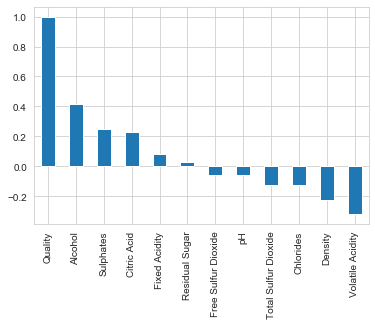

In [55]:
correlations = df_train.corr()['Quality'].sort_values(ascending=False)
print(correlations)
correlations.plot(kind = "bar")

###### We print the correlation dataset with respect to Quality and draw the bar graph for the correlation dataset for the testing dataset.

Quality                 1.000000
Alcohol                 0.376987
Fixed Acidity           0.231691
Citric Acid             0.199176
Sulphates               0.151301
Residual Sugar          0.111019
Density                 0.080337
Chlorides              -0.052386
pH                     -0.062888
Free Sulfur Dioxide    -0.117547
Volatile Acidity       -0.142144
Total Sulfur Dioxide   -0.172831
Name: Quality, dtype: float64


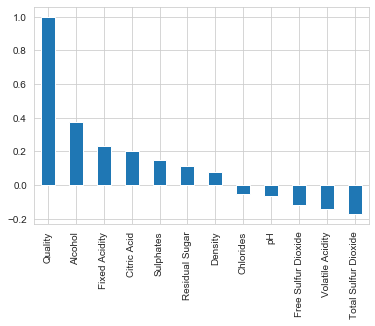

In [56]:
correlations = df_test.corr()['Quality'].sort_values(ascending=False)
print(correlations)
correlations.plot(kind = "bar")

## Heatmap for attributes in respect of Quality for training and testing dataset.

Quality                  True
Alcohol                  True
Fixed Acidity            True
Citric Acid             False
Sulphates               False
Residual Sugar          False
Density                 False
Chlorides               False
pH                      False
Free Sulfur Dioxide     False
Volatile Acidity        False
Total Sulfur Dioxide    False
Name: Quality, dtype: bool


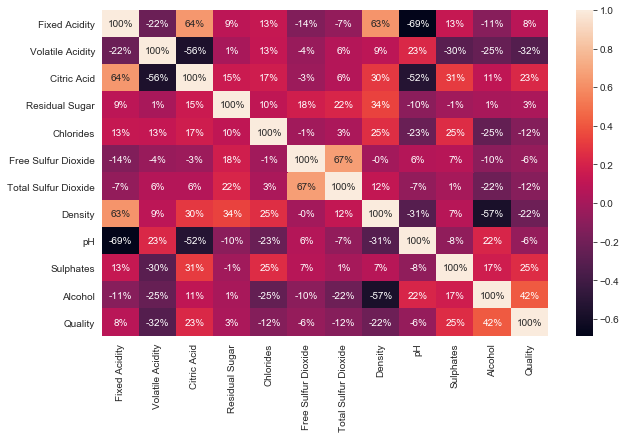

In [57]:
plt.figure(figsize=(10,6))
sns.heatmap(df_train.corr(), annot=True, fmt='.0%')
print(abs(correlations) > 0.2)

Quality                  True
Alcohol                  True
Fixed Acidity            True
Citric Acid             False
Sulphates               False
Residual Sugar          False
Density                 False
Chlorides               False
pH                      False
Free Sulfur Dioxide     False
Volatile Acidity        False
Total Sulfur Dioxide    False
Name: Quality, dtype: bool


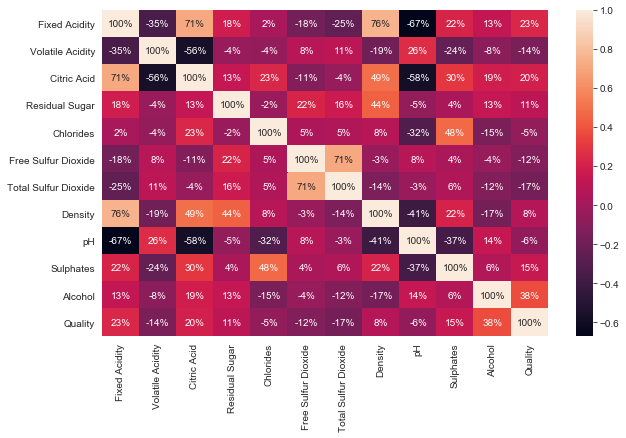

In [58]:
plt.figure(figsize=(10,6))
sns.heatmap(df_test.corr(), annot=True, fmt='.0%')
print(abs(correlations) > 0.2)

***

### Legends for the terms used in the dataset:

fixed acidity: :most acids involved with wine or fixed or nonvolatile (do not evaporate readily).

volatile acidity: the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste.

citric acid: found in small quantities, citric acid can add 'freshness' and flavor to wines.

residual sugar: the amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet.

chlorides: the amount of salt in the wine.

free sulfur dioxide: the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine.

total sulfur dioxide: amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine.

density: the density of wine is close to that of water depending on the percent alcohol and sugar content.

pH: describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale.

sulphates: a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant.

alcohol: the percent alcohol content of the wine.

quality: output variable (based on sensory data, score between 0 and 10)